In [1]:
# Some calculation for the LHF coupling and separation across spatial scales.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
import sys; sys.path.insert(1, '/home/alessandro/thesis_material/EURECA_scripts/')
import geometry as gm
import warnings; warnings.filterwarnings("ignore")

import os
import pickle
from func_statistics import slopes_r_p

# LHF

In [2]:
with open('/venus/tesi_ale/data_EU/Fourier_spectra/forced/forced_LHF_linearExp_spectra.pkl', 'rb') as f:
    dictio_for_LH = pickle.load(f)

with open('/venus/tesi_ale/data_EU/Fourier_spectra/coupled/coupled_LHF_linearExp_spectra.pkl', 'rb') as f:
    dictio_cou_LH = pickle.load(f)

Text(0, 0.5, '$|coeff|^2$ [$W^2\\,m^{-4}$]')

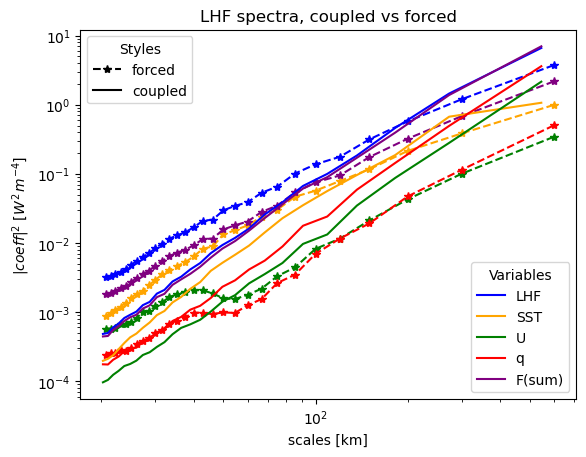

In [35]:
k_for, k_cou = dictio_for_LH['k'], dictio_cou_LH['k']


cols = ['blue', 'orange', 'green', 'red', 'purple']
labs = ['LHF', 'SST', 'U', 'q', 'F(sum)']

for num, var_for in enumerate(dictio_for_LH):
    if var_for == 'k':
        break
    plt.loglog((1/k_for)[1/k_for > 20], dictio_for_LH[var_for][1/k_for > 20], '*--', color=cols[num]) #, label=labs[num])
    
for num, var_cou in enumerate(dictio_cou_LH):
    if var_cou == 'k':
        break
    miao = plt.loglog((1/k_cou)[1/k_cou > 20], dictio_cou_LH[var_cou][1/k_cou > 20], '-', color=cols[num], label=labs[num])
 
    
import matplotlib.lines as mlines
variable_legend = plt.legend(title="Variables", loc='lower right')

# Adding the second legend for styles
forced_style = mlines.Line2D([], [], color='black', linestyle='--', marker='*', label='forced')
coupled_style = mlines.Line2D([], [], color='black', linestyle='-', label='coupled')

style_legend = plt.legend(handles=[forced_style, coupled_style], title="Styles", loc='upper left')

# Adding back the first legend to ensure both are displayed
plt.gca().add_artist(variable_legend)


plt.title('LHF spectra, coupled vs forced')
plt.xlabel('scales [km]')
plt.ylabel('$|coeff|^2$ [$W^2\,m^{-4}$]')

In [44]:
valid_regr_for = (1/k_for > 20) & (1/k_for < 200)
valid_regr_cou = (1/k_cou > 20) & (1/k_cou < 200)
units = "$W^2\,m^{-4}\,km^{-1}$"

for num, var in enumerate(dictio_for_LH):
    if var == 'k':
        break
    x = np.log10(k_for[valid_regr_for])
    y = np.log10(dictio_for_LH[var][valid_regr_for])
    linreg_for, corr_for, p_for, chiSq_for = slopes_r_p(x=x, y=y, std_y=None)
    print('FORCED '+var+' regression')
    print(f'slope = {round(linreg_for.slope,2)} '+units + f'  ;  p = {p_for}'+'\n')

    
print('\n')
print('\n')

for num, var in enumerate(dictio_cou_LH):
    if var == 'k':
        break
    x = np.log10(k_cou[valid_regr_cou])
    y = np.log10(dictio_cou_LH[var][valid_regr_cou])
    linreg_cou, corr_cou, p_cou, chiSq_cou = slopes_r_p(x=x, y=y, std_y=None)
    print('COUPLED '+var+' regression')
    print(f'slope = {round(linreg_cou.slope,2)} '+units + f'  ;  p = {p_cou}'+'\n')


FORCED LHF regression
slope = -2.33 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

FORCED SST regression
slope = -2.5 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

FORCED U regression
slope = -1.67 $W^2\,m^{-4}\,km^{-1}$  ;  p = 3.885780586188048e-14

FORCED q regression
slope = -2.18 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

FORCED F(sum) regression
slope = -2.3 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0





COUPLED LHF regression
slope = -3.18 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED SST regression
slope = -3.27 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED U regression
slope = -3.04 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED q regression
slope = -3.07 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED F(sum) regression
slope = -3.18 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0



# HFX

In [11]:
with open('/venus/tesi_ale/data_EU/Fourier_spectra/forced/forced_HFX_linearExp_spectra.pkl', 'rb') as f:
    dictio_for_HFX = pickle.load(f)

with open('/venus/tesi_ale/data_EU/Fourier_spectra/coupled/coupled_HFX_linearExp_spectra.pkl', 'rb') as f:
    dictio_cou_HFX = pickle.load(f)

Text(0, 0.5, '$|coeff|^2$  [$W^2\\,m^{-4}$]')

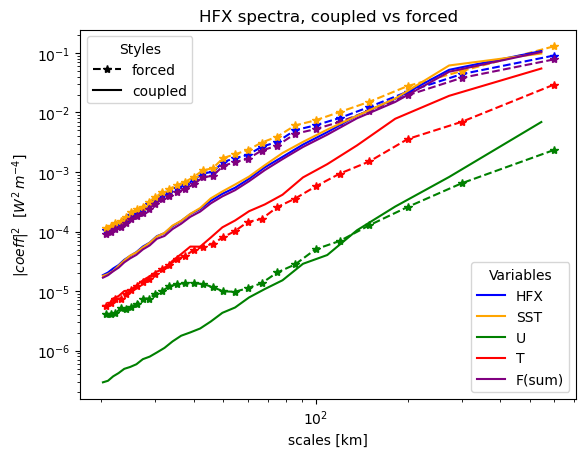

In [36]:
k_for, k_cou = dictio_for_HFX['k'], dictio_cou_HFX['k']


cols = ['blue', 'orange', 'green', 'red', 'purple']
labs = ['HFX', 'SST', 'U', 'T', 'F(sum)']

for num, var_for in enumerate(dictio_for_HFX):
    if var_for == 'k':
        break
    plt.loglog((1/k_for)[1/k_for > 20], dictio_for_HFX[var_for][1/k_for > 20], '*--', color=cols[num]) #, label=labs[num])
    
for num, var_cou in enumerate(dictio_cou_HFX):
    if var_cou == 'k':
        break
    plt.loglog((1/k_cou)[1/k_cou > 20], dictio_cou_HFX[var_cou][1/k_cou > 20], '-', color=cols[num], label=labs[num])


import matplotlib.lines as mlines
variable_legend = plt.legend(title="Variables", loc='lower right')

# Adding the second legend for styles
forced_style = mlines.Line2D([], [], color='black', linestyle='--', marker='*', label='forced')
coupled_style = mlines.Line2D([], [], color='black', linestyle='-', label='coupled')

style_legend = plt.legend(handles=[forced_style, coupled_style], title="Styles", loc='upper left')

# Adding back the first legend to ensure both are displayed
plt.gca().add_artist(variable_legend)


plt.title('HFX spectra, coupled vs forced')
plt.xlabel('scales [km]')
plt.ylabel('$|coeff|^2$  [$W^2\,m^{-4}$]')

In [45]:
valid_regr_for = (1/k_for > 20) & (1/k_for < 200)
valid_regr_cou = (1/k_cou > 20) & (1/k_cou < 200)
units = "$W^2\,m^{-4}\,km^{-1}$"

for num, var in enumerate(dictio_for_HFX):
    if var == 'k':
        break
    x = np.log10(k_for[valid_regr_for])
    y = np.log10(dictio_for_HFX[var][valid_regr_for])
    linreg_for, corr_for, p_for, chiSq_for = slopes_r_p(x=x, y=y, std_y=None)
    print('FORCED '+var+' regression')
    print(f'slope = {round(linreg_for.slope,2)} '+units + f'  ;  p = {p_for}'+'\n')

    
print('\n')
print('\n')

for num, var in enumerate(dictio_cou_HFX):
    if var == 'k':
        break
    x = np.log10(k_cou[valid_regr_cou])
    y = np.log10(dictio_cou_HFX[var][valid_regr_cou])
    linreg_cou, corr_cou, p_cou, chiSq_cou = slopes_r_p(x=x, y=y, std_y=None)
    print('COUPLED '+var+' regression')
    print(f'slope = {round(linreg_cou.slope,2)} '+units + f'  ;  p = {p_cou}'+'\n')


FORCED HFX regression
slope = -2.43 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

FORCED SST regression
slope = -2.5 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

FORCED U regression
slope = -1.55 $W^2\,m^{-4}\,km^{-1}$  ;  p = 2.9316549188251884e-12

FORCED T regression
slope = -2.83 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

FORCED F(sum) regression
slope = -2.44 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0





COUPLED HFX regression
slope = -3.21 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED SST regression
slope = -3.27 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED U regression
slope = -3.04 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED T regression
slope = -3.28 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0

COUPLED F(sum) regression
slope = -3.21 $W^2\,m^{-4}\,km^{-1}$  ;  p = 0.0



# forced only, trying to fit LHF and HFX on the same plot

In [3]:
with open('/venus/tesi_ale/data_EU/Fourier_spectra/forced/forced_LHF_linearExp_spectra_SigmaINF.pkl', 'rb') as f:
    dictio_for_LH = pickle.load(f)

with open('/venus/tesi_ale/data_EU/Fourier_spectra/forced/forced_HFX_linearExp_spectra_sigmaINF.pkl', 'rb') as f:
    dictio_for_HFX = pickle.load(f)

In [ ]:
TO FINISH

In [ ]:
k_lhf, k_hfx = dictio_for_LH['k'], dictio_for_HFX['k']


# cols = ['blue', 'orange', 'green', 'red', 'purple']
# labs = ['HFX', 'SST', 'U', 'T', 'F(sum)']

for num, var_for in enumerate(dictio_for_HFX):
    if var_for == 'k':
        break
    plt.loglog((1/k_for)[1/k_for > 20], dictio_for_HFX[var_for][1/k_for > 20], '*--', color=cols[num]) #, label=labs[num])
    
for num, var_cou in enumerate(dictio_cou_HFX):
    if var_cou == 'k':
        break
    plt.loglog((1/k_cou)[1/k_cou > 20], dictio_cou_HFX[var_cou][1/k_cou > 20], '-', color=cols[num], label=labs[num])


import matplotlib.lines as mlines
variable_legend = plt.legend(title="Variables", loc='lower right')

# Adding the second legend for styles
forced_style = mlines.Line2D([], [], color='black', linestyle='--', marker='*', label='forced')
coupled_style = mlines.Line2D([], [], color='black', linestyle='-', label='coupled')

style_legend = plt.legend(handles=[forced_style, coupled_style], title="Styles", loc='upper left')

# Adding back the first legend to ensure both are displayed
plt.gca().add_artist(variable_legend)


plt.title('HFX spectra, coupled vs forced')
plt.xlabel('scales [km]')
plt.ylabel('$|coeff|^2$  [$W^2\,m^{-4}$]')